---
# Using Monte Carlo Integration to Find RLCT
---

The idea is to use the fact that RLCT, $\lambda$ is given by 

$$
 \lambda = \lim_{t \to 0} \log_a \frac{V(at)}{V(t)}
$$

for any $a > 0$, $a \neq 1$ and $V$ is the (prior weighted) volume function near the zero set of the KL-divergence $K$, i.e. 

$$
  V(t) = \int_{K(w) < t} \varphi(w) dw
$$

In [5]:
using Plots

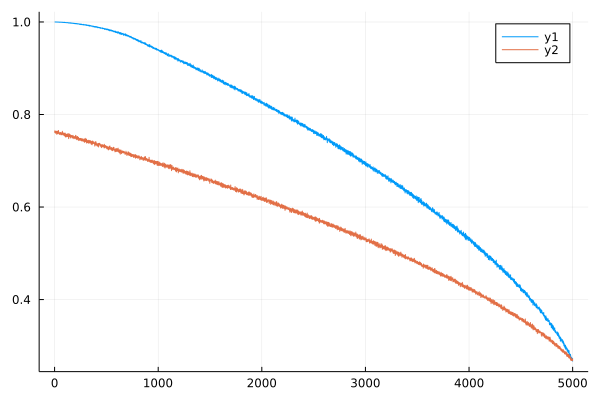

In [117]:

function calc_vol(k, t, num_sample=1000)
    count = 0
    for i in 1:num_sample
        x, y = rand(2)
        if k(x, y) < t
            count += 1
        end
    end
    return count / num_sample
end

a = 2.0
#k(x, y) = x^2 + y^2
k(x, y) = y^2 - x * (x - 1) * (x - 1)
φ(x, y) = 1
xrange = (0, 1)
yrange = (0, 1)

ϵ = 0.0001
num_sample = 50000

v_at = [] 
v_t = []
ts = 0.5:-ϵ:ϵ
for t in ts
    push!(v_at, calc_vol(k, a * t, num_sample))
    push!(v_t, calc_vol(k, t, num_sample))
end

plot(v_at)
plot!(v_t)

[0.03242625632357468, -0.008546796565692658, -0.004048028318811094, -0.0008559448728613843, 0.0069749979782568845, 0.003425305163608075, 0.021929943134960266, 0.008052666552180092, 0.006578938477546398, 0.00010752338673783262, -0.034164066700412964]


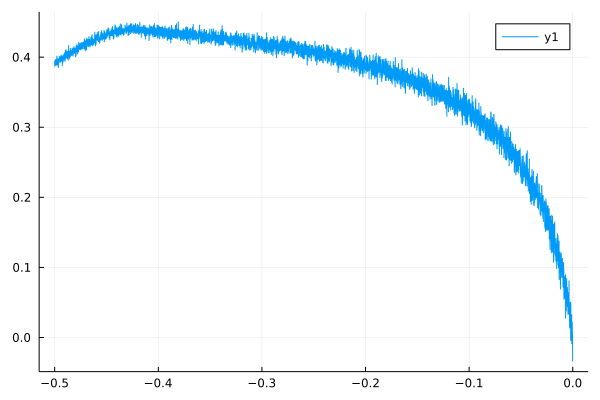

In [118]:
λₛ = log.(v_at ./ v_t) ./ log(a)
println(λₛ[end - 10:end])
plot(-ts, λₛ)

In [49]:
x = calc_vol(k, 0.1, 10000000)
y = calc_vol(k, 0.05, 10000000)

x, y, x/y, log(x/y) / log(2), 

(0.0785054, 0.0391575, 2.004862414607674, 1.003503233900169)

In [51]:
π * 0.1^2 / 4

0.007853981633974483

In [171]:
k(x, y) = y^2 - x * (x - 1) * (x -1 )
n = 100000
data = 3 .* (rand(n, 2) .- 0.5)
vals =  k.(data[:, 1], data[:, 2]) 

p1 = plot()
ts = [0.1, 0.01, 0.001, 0.0001]
for i in 1:length(ts)
    in_region = (vals .<= ts[i])
    scatter!(p1, data[in_region, 1], data[in_region, 2], markersize=1.5, markerstrokecolor="white", label="$(ts[i])")
    #scatter!(p1, data[.!in_circle, 1], data[.!in_circle, 2], markersize=1.5, markerstrokecolor="white")
end
p1

15070
10103
9344
9247
